In [1]:
import parquet
import pyarrow
import pandas as pd

In [2]:
dataset_path = r'C:\Users\anja.kovacevic\Downloads\lumen_dataset_v2\lumen_dataset\data\lumen\train.parquet'
df = pd.read_parquet(dataset_path)

In [3]:
df.head()

,reservation_id,night_number,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,resort_id,...,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id
0,73710,1.0,2007-12-13,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,4255.462,425.517,452.089,4564.690,265.428,26.572,43.800,0.000,3,10.0
1,73710,2.0,2007-12-14,22897,HR,Checked-out,2007-11-28,2007-12-13,2007-12-15,1,...,4243.709,424.349,450.921,4552.937,265.428,26.572,43.800,0.000,3,10.0
2,74464,1.0,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,1,...,4336.857,433.693,3806.147,19764.823,530.929,53.071,14897.037,3319.383,4,4.0
3,74461,1.0,2008-01-01,38936,GB,Cancelled,2007-12-29,2008-01-01,2008-01-02,1,...,8536.766,853.662,1012.948,10392.280,1592.714,159.286,262.800,0.000,5,3.0
4,74466,1.0,2008-01-01,106279,HR,Cancelled,2007-12-29,2008-01-01,2008-01-03,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      31634 non-null  int64         
 1   night_number        31634 non-null  float64       
 2   stay_date           31634 non-null  datetime64[ns]
 3   guest_id            31634 non-null  int64         
 4   guest_country_id    31634 non-null  object        
 5   reservation_status  31634 non-null  object        
 6   reservation_date    31634 non-null  object        
 7   date_from           31634 non-null  object        
 8   date_to             31634 non-null  object        
 9   resort_id           31634 non-null  int64         
 10  cancel_date         6151 non-null   object        
 11  room_cnt            31634 non-null  int64         
 12  adult_cnt           31634 non-null  int64         
 13  children_cnt        31634 non-null  int64     

In [5]:
df.describe()

,reservation_id,night_number,stay_date,guest_id,resort_id,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id
count,31634.000000,31634.000000,31634,31634.000000,31634.0,31634.000000,31634.000000,31634.000000,27860.000000,27860.000000,28076.000000,28076.000000,27860.000000,27860.000000,27860.000000,27860.000000,31634.000000,31634.000000
mean,82726.976102,4.928874,2009-01-04 07:23:16.800910336,66420.902067,1.0,2.581178,3.837169,0.000158,12366.242495,1236.536998,1530.393681,15810.696197,1283.381136,128.299446,2276.642024,176.647816,3.533287,4.894512
min,13685.000000,1.000000,2007-12-13 00:00:00,104.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,78400.250000,1.000000,2008-07-04 00:00:00,23589.000000,1.0,1.000000,1.000000,0.000000,1835.460000,183.540000,206.265000,2104.650000,170.910000,17.080000,51.100000,0.000000,2.000000,2.000000
50%,82905.500000,2.000000,2009-01-01 00:00:00,63575.000000,1.0,1.000000,1.000000,0.000000,5198.184000,519.833000,611.010000,6314.974500,623.785000,62.342000,244.550000,0.000000,3.000000,3.000000
75%,87132.750000,4.000000,2009-07-12 00:00:00,107000.750000,1.0,1.000000,2.000000,0.000000,15339.088500,1533.803000,1850.769000,18818.286750,1559.499000,155.855000,2002.463000,119.793000,5.000000,10.000000
max,91366.000000,226.000000,2009-12-31 00:00:00,149866.000000,1.0,60.000000,60.000000,1.000000,395442.387000,39544.976000,47315.680000,467782.613000,37741.730000,3773.370000,234320.145000,15441.325000,11.000000,18.000000
std,5023.282235,12.878147,NaN,42866.831472,0.0,5.172606,8.683641,0.012571,20590.179794,2059.042719,2622.469055,27079.984236,2488.930538,248.911415,5733.679232,507.996673,1.554350,3.574326


In [28]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
print(null)

                    Null Values  Percentage Null Values
reservation_id                0                0.000000
night_number                  0                0.000000
stay_date                     0                0.000000
guest_id                      0                0.000000
guest_country_id              0                0.000000
reservation_status            0                0.000000
reservation_date              0                0.000000
date_from                     0                0.000000
date_to                       0                0.000000
resort_id                     0                0.000000
cancel_date               25483               80.555731
room_cnt                      0                0.000000
adult_cnt                     0                0.000000
children_cnt                  0                0.000000
price                      3774               11.930202
price_tax                  3774               11.930202
total_price_tax            3558               11

In [38]:
# filling null values with zero (easy if-else)
df.fillna(0, inplace = True)

In [40]:
print("Number of res_ids:", df['reservation_id'].nunique())
print("Number of gost_ids:", df['guest_id'].nunique())
print("Number cancelled reservations:", df['cancel_date'].nunique())

Number of res_ids: 15322
Number of gost_ids: 4806
Number cancelled reservations: 633


In [7]:
print(f"First arrival date: {min(df['date_from'])}")
print(f"Last arrival date: {max(df['date_to'])}")

First arrival date: 2007-12-13
Last arrival date: 2010-01-16


In [8]:
print(f"First reservation: {min(df['reservation_date'])}")
print(f"Last reservation: {max(df['reservation_date'])}")

First reservation: 2007-03-04
Last reservation: 2009-12-31


In [11]:
num_unique_countries = df['guest_country_id'].nunique()
print("Number of unique countries:", num_unique_countries)

Number of unique countries: 66


In [12]:
# dictionary containing country and total reservations from it
country_reservation = {}

# dictionary containing country and not cancelled reservations from it
country_reservation_without_cancelation = {}

for country in df['guest_country_id'].unique():
  reservations_by_country = len(df[df['guest_country_id'] == country])
  country_reservation[country] = reservations_by_country

# sorted dicts
country_reservation = dict(sorted(country_reservation.items(), key=lambda item: item[1], reverse=True))

# prints all countries that have above N reservations
def print_conutries_above_N(country_dict, N=100):
  for key, value in country_dict.items():
    if value > N:
        print(f"{key}: {value}")

# prints top N countries based on reservations
def print_top_N(country_dict, N=100):
  i = 0
  for key, value in country_dict.items():
    print(f"{key}: {value}")
    i += 1
    if i >= N:
      break

In [13]:
print("Countries with more than 1000 reservations, canceled reservations included:")
print_conutries_above_N(country_reservation)

Countries with more than 1000 reservations, canceled reservations included:
HR: 16061
I: 6041
F: 2057
GB: 1712
NL: 1052
D: 858
SLO: 819
USA: 353
SGP: 262
AUT: 259
CH: 252
N: 189
E: 148
DK: 106
IL: 103
ET: 103


In [14]:
print("Different channel ids:", df['sales_channel_id'].unique())

Different channel ids: [10.  4.  3.  1.  9.  2. 11.  5. 16.  6. 18. 17.  8. 15. 12.]


In [15]:
print("Different rooms types (ids):", df['room_category_id'].unique())

Different rooms types (ids): [ 3  4  5  6  7  2 11  1]


In [16]:
correlation = df['children_cnt'].corr(df['room_category_id'])
print(f"Correlation between 'children_cnt' and 'room_category_id' columns: {correlation}")
correlation = df['adult_cnt'].corr(df['room_category_id'])
print(f"Correlation between 'adult_cnt' and 'room_category_id' columns: {correlation}")
correlation = df['price'].corr(df['room_category_id'])
print(f"Correlation between 'price' and 'room_category_id' columns: {correlation}")

Correlation between 'children_cnt' and 'room_category_id' columns: 0.011864391745032801
Correlation between 'broj_odraslih_gostiju' and 'room_category_id' columns: 0.23562174852459053
Correlation between 'price' and 'room_category_id' columns: 0.03457629229758602


Ovde postoji situacija razlicitih cena, sa porezom, bez....

In [18]:
print("Different numbers of kids:", df['children_cnt'].nunique())

kids_count = {}

for kids_number in df['children_cnt'].unique():
  res_num = len(df[df['children_cnt'] == kids_number])
  kids_count[kids_number] = res_num
  print(f"There are {res_num} reserveations for {int(kids_number)} kids.")

Different numbers of kids: 2
There are 31629 reserveations for 0 kids.
There are 5 reserveations for 1 kids.


In [24]:
adult_count = {}

for adult_number in df['adult_cnt'].unique():
    res_num = len(df[df['adult_cnt'] == adult_number])
    adult_count[adult_number] = res_num

sorted_adult_count = dict(sorted(adult_count.items(), key=lambda item: item[1], reverse=True))

for adult_number, res_num in sorted_adult_count.items():
    print(f"{res_num} reservations for {int(adult_number)} adults.")


18442 reservations for 1 adults.
7478 reservations for 2 adults.
1600 reservations for 3 adults.
880 reservations for 4 adults.
311 reservations for 7 adults.
296 reservations for 5 adults.
268 reservations for 50 adults.
200 reservations for 32 adults.
168 reservations for 6 adults.
155 reservations for 40 adults.
87 reservations for 15 adults.
86 reservations for 45 adults.
85 reservations for 21 adults.
84 reservations for 20 adults.
79 reservations for 8 adults.
76 reservations for 26 adults.
74 reservations for 10 adults.
74 reservations for 25 adults.
69 reservations for 35 adults.
66 reservations for 30 adults.
59 reservations for 12 adults.
57 reservations for 19 adults.
56 reservations for 31 adults.
54 reservations for 9 adults.
50 reservations for 42 adults.
47 reservations for 48 adults.
45 reservations for 36 adults.
44 reservations for 16 adults.
42 reservations for 29 adults.
42 reservations for 13 adults.
40 reservations for 17 adults.
39 reservations for 41 adults.
36 

Mozda cesto dolaze ljudi iz starackog doma, ili ljudi na poslovnom putu, posto ima dosta rezervacija za 50, 32, 40 ljudi.

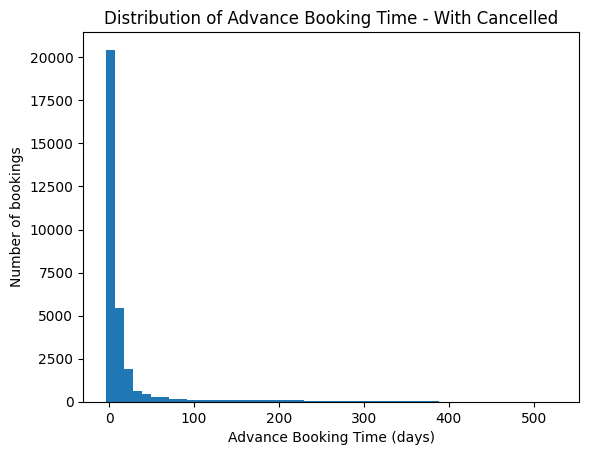

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert string dates to datetime objects
df['date_from'] = pd.to_datetime(df['date_from'])
df['reservation_date'] = pd.to_datetime(df['reservation_date'])

# Calculate advance booking time in days
advance_booking_time = (df['date_from'] - df['reservation_date']).dt.days

# Plot the histogram
plt.hist(advance_booking_time, bins=50)
plt.xlabel('Advance Booking Time (days)')
plt.ylabel('Number of bookings')
plt.title('Distribution of Advance Booking Time - With Cancelled')
plt.show()


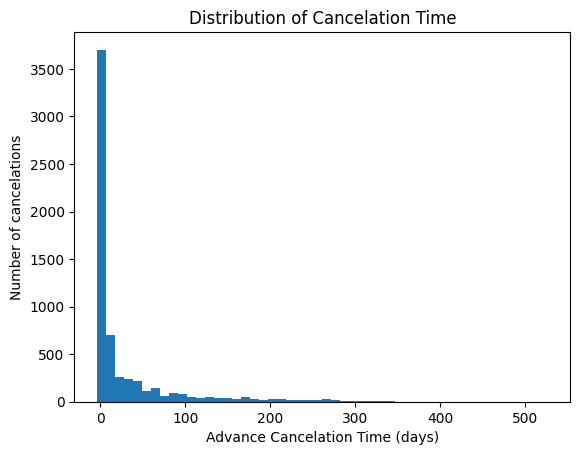

In [27]:
arrival_date = df[~df['cancel_date'].isnull()]['date_from']
arrival_date = pd.to_datetime(arrival_date)
cancelation_date = df[~df['cancel_date'].isnull()]['cancel_date']
cancelation_date = pd.to_datetime(cancelation_date, errors='coerce')

advance_cancelation_time = arrival_date - cancelation_date
advance_cancelation_time = advance_cancelation_time.apply(lambda x: x.days)

plt.hist(advance_cancelation_time, bins=50)
plt.xlabel('Advance Cancelation Time (days)')
plt.ylabel('Number of cancelations')
plt.title('Distribution of Cancelation Time')
plt.show()

In [43]:
df['month'] = df['date_from'].dt.strftime('%b')
# Group by month and calculate the average price
avg_price_per_month = df.groupby('month')['price'].mean()
print(avg_price_per_month)

month
Apr     9831.750349
Aug    11674.528378
Dec     8470.382119
Feb    10228.377471
Jan     7298.041616
Jul     9075.282741
Jun    10890.143212
Mar    11034.145923
May    11996.466650
Nov    10605.550421
Oct    10931.851120
Sep    16308.129221
Name: price, dtype: float64


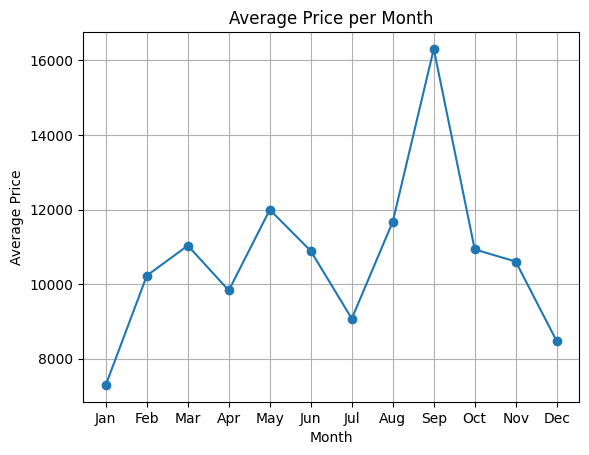

In [44]:
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(avg_price_per_month.loc[months_order].index, avg_price_per_month.loc[months_order].values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price per Month')
plt.xticks(range(12), months_order) 
plt.grid(True)
plt.show()

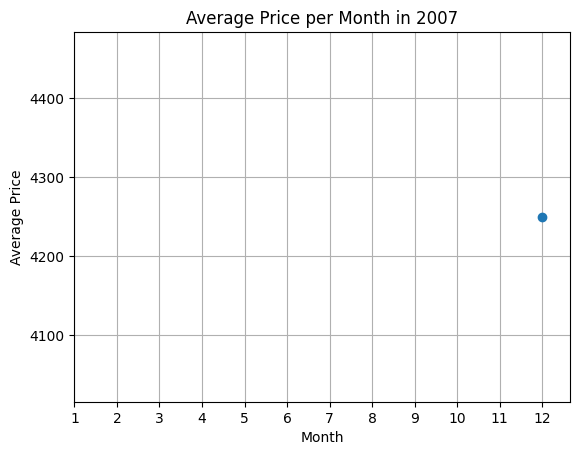

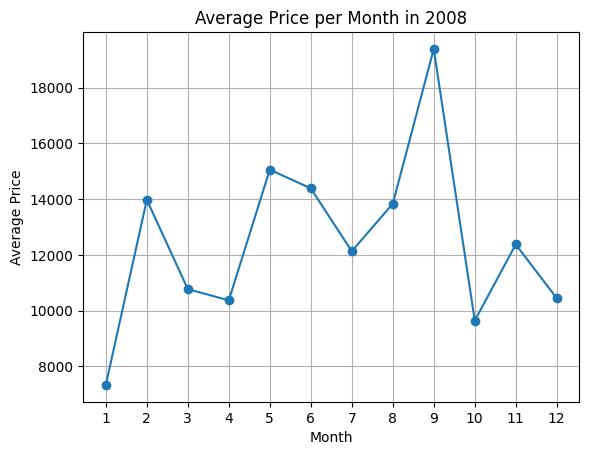

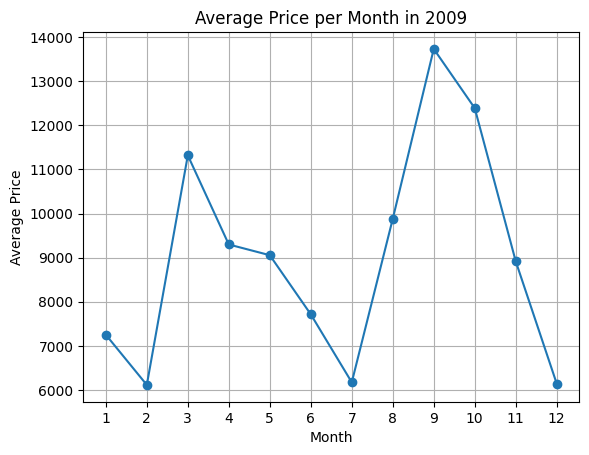

In [45]:
df['year'] = df['date_from'].dt.year

# Group by year and month and calculate the average price
avg_price_per_year_month = df.groupby(['year', df['date_from'].dt.month])['price'].mean().unstack()

# Plot each year's data separately
for year in avg_price_per_year_month.index:
    plt.figure()  # Create a new figure for each year
    plt.plot(avg_price_per_year_month.loc[year], marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.title(f'Average Price per Month in {year}')
    plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
    plt.grid(True)

plt.show()